# REGRESSION LINEAIRE 
*** Notre projet d'aujourd'hui portera sur un cas d'étude simple permettant de comprendre une des méthodes d'analyse simple en Machine Learning (Apprentissage automatique), un sous domaine de l'Intelligence artificielle.***
Pour une mise en contexte, Le machine learning consiste à emmener une machine à apprendre en vue de prendre des decisions ou faire des prédictions, basées sur des données. Le concept, c'est détecter des règles et relations qui régissent nos données, et les implémenter afin de faire  des prédictions par exemples.

Il existe plusieurs formes de Machine learning(Apprentissage supervisé, non supervisé, par renforcement,...). Notre solution se concentrera sur un cas de figure d'apprentissage supervisé. 
Cela signifie que nos données sont déjà étiquettées(on connait leur sortie). L'objectif est donc d'apprendre de ces données et de prédire les nouvelles étiquettes.

Le sujet d'aujourdhui est énoncé comme suit: Prédiction du salaire d'un individu, sur la base de ses années d'expérience.
Notre source de données est contenu dans le fichier "Salary Data.csv".

In [78]:
# Commençons par l'import des librairies et bibliothèques dont on aura besoin
import pandas as pd #bibliothèque d'analyse de donnees de grande dimension
import matplotlib.pyplot as plt

In [79]:
# Importons nos donnees
donnees = pd.read_csv('Salary Data.csv')

In [80]:
#Afficher les cinq premières lignes des donnees
donnees.head()

,Experience Years,Salary
0,1.1,39343
1,1.2,42774
2,1.3,46205
3,1.5,37731
4,2.0,43525


# Exploration des données

In [81]:
#affichage des colonnes
donnees.columns

Index(['Experience Years', 'Salary'], dtype='object')

In [82]:
#description des caractéristiques de nos donnees
donnees.describe()

,Experience Years,Salary
count,40.000000,40.000000
mean,5.152500,74743.625000
std,2.663715,25947.122885
min,1.100000,37731.000000
25%,3.200000,56878.250000
50%,4.600000,64472.500000
75%,6.875000,95023.250000
max,10.500000,122391.000000


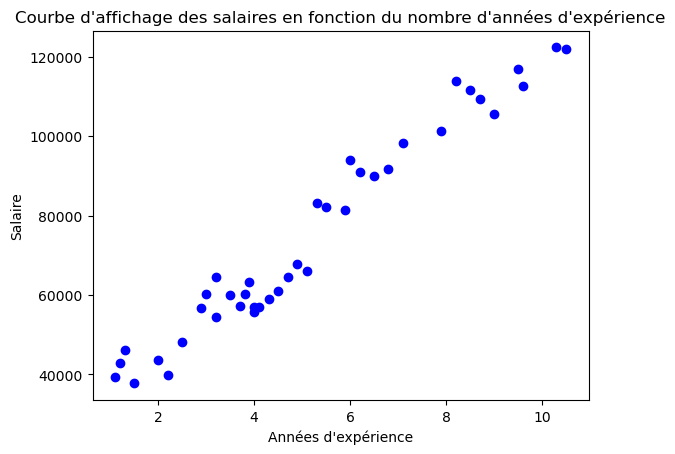

In [83]:
# Tracer la courbe des donnees
plt.figure()
plt.scatter(donnees['Experience Years'], donnees['Salary'], color='blue')

# Labels et titre
plt.xlabel("Années d'expérience")
plt.ylabel("Salaire")
plt.title("Courbe d'affichage des salaires en fonction du nombre d'années d'expérience")

# Afficher la courbe
plt.show()

*** Souvenez vous! le but de l'exploration de données c'est de  nettoyer les donnees(valeurs nulles, erreurs,...), de les comprendre, mais aussi de détecter les relations. Ici, nous pouvons aisément voir la tendance que suivent nos données. 
Il s'agit d'une droite! Chose qui nus facilite la tâche. on a donc une relation du type y= ax+b avec y(salaire) et x(nombre d'expérience) 
Il sufffit donc de dire à la machine qu'étant donnée une année d'epérience, il existe une droite, qu'elle devra trouver, qui lui permettra de prédire le salaire de l'individu en question
Une fois a et b trouvé, la prédiction de nouveau salaire ne sera qu'un jeu d'enfant!

Pour trouver ces paramètres, plusieurs étapes doivent être suivis et nécessitent, plusieurs notions doivent être assimilées(modèle, erreur,descente de gradient, optimisation,....). Mais ne vous inquiétez pas! Python dispose de nombreuses librairies qui ont déjà implémentées ces procédures. Pour l'heure retenez que nous utiliserons le modèle de regression linéaire(ax+b) avec la bibliothèque sklearn de Python.
***

#Modélisation

In [84]:
#Donnees de sortie
y = donnees['Salary']

In [85]:
#Donnees d'entree
X = donnees[['Experience Years']]

In [86]:
''' Pour évaluer les performances de notre modèle plus tard, 
il nous faudra diviser nos données en données d'entrainement du modèle de regression et de test'''
# Pour cela utilisons la fonction train_test_split de sklearn.model_selection: On prendra 70% pour l'entrainement et 30% pour le test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, random_state=2529)

In [87]:
#Dimensions de nos données divisées
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((28, 1), (12, 1), (28,), (12,))

In [88]:
#Enfin le modèle instancié
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [89]:
# Entraînement du modèle
model.fit(X_train,y_train)

LinearRegression()

In [90]:
#Valeur du a obtenu après entrainement
model.intercept_

26596.961311068255

In [91]:
#Valeur du b obtenu après entrainement
model.coef_

array([9405.61663234])

In [92]:
# Prédiction avec les donnees de test
y_pred = model.predict(X_test)

# Performances du modèle

In [93]:
#Calculons le taux de précision du modèle
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
mean_absolute_error(y_test,y_pred)
mean_absolute_percentage_error(y_test,y_pred)
mean_squared_error(y_test,y_pred)

24141421.671440985

La somme des erreurs est le critère à minimiser, justement. Plus cette somme est proche de zéro, plus le modèle est précis et prédit les bonne valeurs

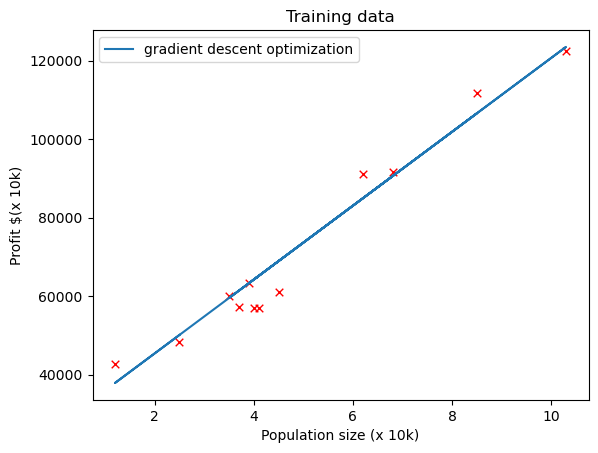

In [94]:
# Affichage des données réelles par rapport à celles prédites
plt.figure(3)
plt.scatter(X_test, y_test, s=30, c='r', marker='x', linewidths=1)
plt.plot(X_test, y_pred,label='gradient descent optimization'.format(i=1))
plt.legend(loc='best')
plt.title('Training data')
plt.xlabel('Population size (x 10k)')
plt.ylabel('Profit $(x 10k)')
plt.show()

#